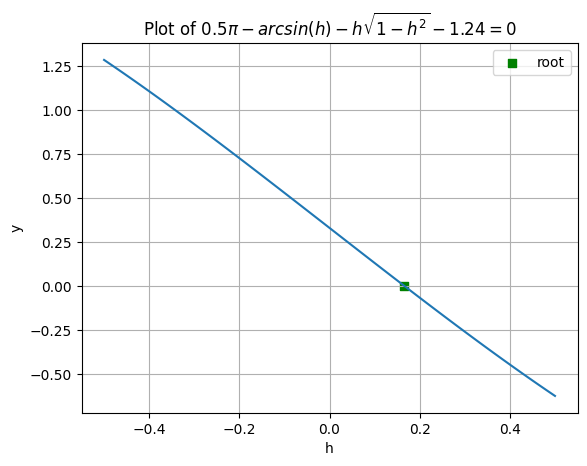

El valor de la raíz es: 0.166

Como el radio del abrevadero mide 1pie, entonces
la profundidad del abrevadero es de:  0.834 pies


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Primero, hay que despejar la ecuación, dejándola de la forma y = f(h)
def equation(x):
    return 0.5*np.pi - np.arcsin(x) - x*np.sqrt(1-x**2) - 1.24

def bisection(a, b, equation, tol=1e-2, N=50):
    """
    Método de la Bisección: encuentra la raiz de una ecuación dentro de un intervalo [a,b].
    """
    if equation(a) * equation(b) >= 0:
        raise ValueError("No hay raíz en el intervalo dado.")

    a_n = a
    b_n = b

    for n in range(1, N+1):
        m_n = (a_n + b_n)/2
        f_m_n = equation(m_n)

        if abs(f_m_n) < tol:
            return m_n

        if equation(a_n) * f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif equation(b_n) * f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            raise ValueError("El método de la bisección falló.")

    return (a_n + b_n)/2

def FL_rounding(num:float, digits:int)->float:
  ''' Rounds the given ``num`` with the given significant ``digits``.
  Used for arithmetic computation.
  '''
  num = float(f"{num:.{digits - 1}e}")
  return num

def plotting(a, b, i):
    x = np.linspace(a, b, 100)
    y = equation(x)
    root = bisection(a, b, equation=equation, tol=1e-6, N=1000)

    plt.plot(x, y)
    plt.xlabel('h')
    plt.ylabel('y')
    plt.title('Plot of $0.5\pi-arcsin(h)-h\sqrt{1-h^2}-1.24 = 0$')
    plt.scatter(root, 0, color='green', marker='s', label='root')
    plt.grid(True)
    plt.legend()
    plt.show()
    root = FL_rounding(root,3)
    print("El valor de la raíz es:", root)
    print("\nComo el radio del abrevadero mide 1pie, entonces\nla profundidad del abrevadero es de: ",1-root,"pies")

# Llamar a la función plotting directamente
plotting(-0.5, 0.5, 11)